In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [184]:
df_Moufia = pd.read_csv("Moufia_2014_2015/moufia_2014_2015.csv")
df_Possession = pd.read_csv("Possession_2014_2015/possession_2014_2015.csv")
df_SaintAndre = pd.read_csv("SaintAndre_2014_205/saintandre_2014_2015.csv")
df_SaintLeu = pd.read_csv("SaintLeu_2014_2015/saintleu_2014_2015.csv")
df_SaintPierre = pd.read_csv("SaintPierre_2014_2015/saintpierre_2014_2015.csv")

df_Moufia.head()
df_Possession.head()
df_SaintAndre.head()
df_SaintLeu.head()
df_SaintPierre.head()

,Timestamp,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean
0,2014-01-01 00:00:00,3.871,3.643,1002.8,73.16666,25.5,37.50000,1.983333
1,2014-01-01 00:01:00,3.871,3.814,1002.8,73.11666,25.5,29.49695,2.283333
2,2014-01-01 00:02:00,1.366,8.710,1002.8,72.83334,25.5,26.65659,2.783333
3,2014-01-01 00:03:00,3.871,6.318,1002.8,72.43333,25.5,24.82494,3.133333
4,2014-01-01 00:04:00,3.871,3.814,1002.8,72.33334,25.5,20.83340,3.316667


In [185]:
df_Moufia['Timestamp'] = pd.DatetimeIndex(df_Moufia['Timestamp']) 
df_Moufia.set_index('Timestamp',inplace = True)

In [186]:
df_Moufia = df_Moufia[['FD_Avg','FG_Avg','Text_Avg','WD_MeanUnitVector','WS_Mean']]
df_Moufia.head()

,FD_Avg,FG_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean
Timestamp,,,,,
2014-01-01 00:00:00,7.999,1.759,24.60000,100.99800,4.616667
2014-01-01 00:01:00,1.361,4.084,24.58333,94.43468,3.750000
2014-01-01 00:02:00,3.574,6.297,24.51666,97.81310,5.583333
2014-01-01 00:03:00,5.673,2.212,24.50000,92.55701,5.300000
2014-01-01 00:04:00,1.588,6.524,24.50000,98.83556,4.650000


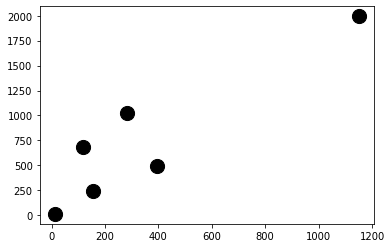

In [187]:
from sklearn.cluster import KMeans
import numpy as np
X = df_Moufia.to_numpy()
nb_cluster = 6
kmeans = KMeans(n_clusters=nb_cluster, random_state=42).fit(X)
labels = kmeans.labels_

#kmeans.predict([[0, 0], [12, 3]])

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=1);

In [188]:
cluster_map = pd.DataFrame()
cluster_map['data_index'] = df_Moufia.index.values
cluster_map['cluster'] = labels

In [189]:
cluster_map.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023581 entries, 0 to 1023580
Data columns (total 2 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   data_index  1023581 non-null  datetime64[ns]
 1   cluster     1023581 non-null  int32         
dtypes: datetime64[ns](1), int32(1)
memory usage: 11.7 MB


In [190]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [191]:
df_Moufia['cluster'] = cluster_map['cluster'].values
df_Moufia.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1023581 entries, 2014-01-01 00:00:00 to 2015-12-31 00:00:00
Data columns (total 6 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   FD_Avg             1023581 non-null  float64
 1   FG_Avg             1023581 non-null  float64
 2   Text_Avg           1023581 non-null  float64
 3   WD_MeanUnitVector  1023581 non-null  float64
 4   WS_Mean            1023581 non-null  float64
 5   cluster            1023581 non-null  int32  
dtypes: float64(5), int32(1)
memory usage: 50.8 MB


In [192]:
for i in range(nb_cluster):
    print(cluster_map[cluster_map.cluster == i].shape)
    #print(cluster_map[cluster_map.cluster == i].tail(40))

(153847, 2)
(16027, 2)
(94140, 2)
(626917, 2)
(68214, 2)
(64436, 2)


In [193]:
df_Moufia.head()

,FD_Avg,FG_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,cluster
Timestamp,,,,,,
2014-01-01 00:00:00,7.999,1.759,24.60000,100.99800,4.616667,3
2014-01-01 00:01:00,1.361,4.084,24.58333,94.43468,3.750000,3
2014-01-01 00:02:00,3.574,6.297,24.51666,97.81310,5.583333,3
2014-01-01 00:03:00,5.673,2.212,24.50000,92.55701,5.300000,3
2014-01-01 00:04:00,1.588,6.524,24.50000,98.83556,4.650000,3


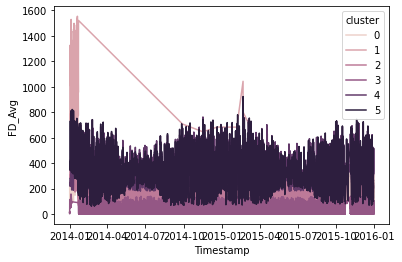

In [194]:
plot = sns.lineplot(x=df_Moufia.index, y='FD_Avg', hue='cluster', data=df_Moufia)
plot.figure.savefig("clusters_alldata.png")

In [77]:
new_df = df_Moufia[df_Moufia.index < "2014-03-01 00:00:00"]
#new_df.head(900)

,FD_Avg,FG_Avg,Patm_Avg,RH_Avg,Text_Avg,WD_MeanUnitVector,WS_Mean,cluster
Timestamp,,,,,,,,
2014-01-01 00:00:00,7.999,1.759,973.1667,68.56667,24.60000,100.99800,4.616667,3
2014-01-01 00:01:00,1.361,4.084,973.1667,68.71667,24.58333,94.43468,3.750000,3
2014-01-01 00:02:00,3.574,6.297,973.1500,68.83333,24.51666,97.81310,5.583333,3
2014-01-01 00:03:00,5.673,2.212,973.1166,69.15000,24.50000,92.55701,5.300000,3
2014-01-01 00:04:00,1.588,6.524,973.0999,69.33334,24.50000,98.83556,4.650000,3
2014-01-01 00:05:00,3.574,4.311,973.0667,69.23333,24.50000,101.17740,6.366667,3
2014-01-01 00:06:00,3.801,4.425,973.0833,69.46667,24.50000,88.85400,4.716667,3
2014-01-01 00:07:00,5.956,4.255,973.0000,69.60000,24.50000,98.02304,5.566667,3
2014-01-01 00:08:00,3.574,6.354,972.9833,69.56667,24.50000,93.82326,5.150000,3


<AxesSubplot:xlabel='Timestamp', ylabel='FD_Avg'>

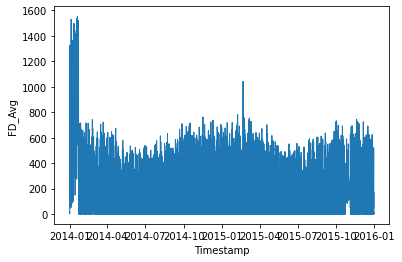

In [198]:
#Without cluster 3
df_nocluster = df_Moufia[df_Moufia.cluster != 1]
sns.lineplot(x="Timestamp",y= "FD_Avg", data=df_nocluster3, palette="tab10", linewidth=1)

Draw the 0 graph.
Draw the 1 graph.
Draw the 2 graph.
Draw the 3 graph.
Draw the 4 graph.
Draw the 5 graph.


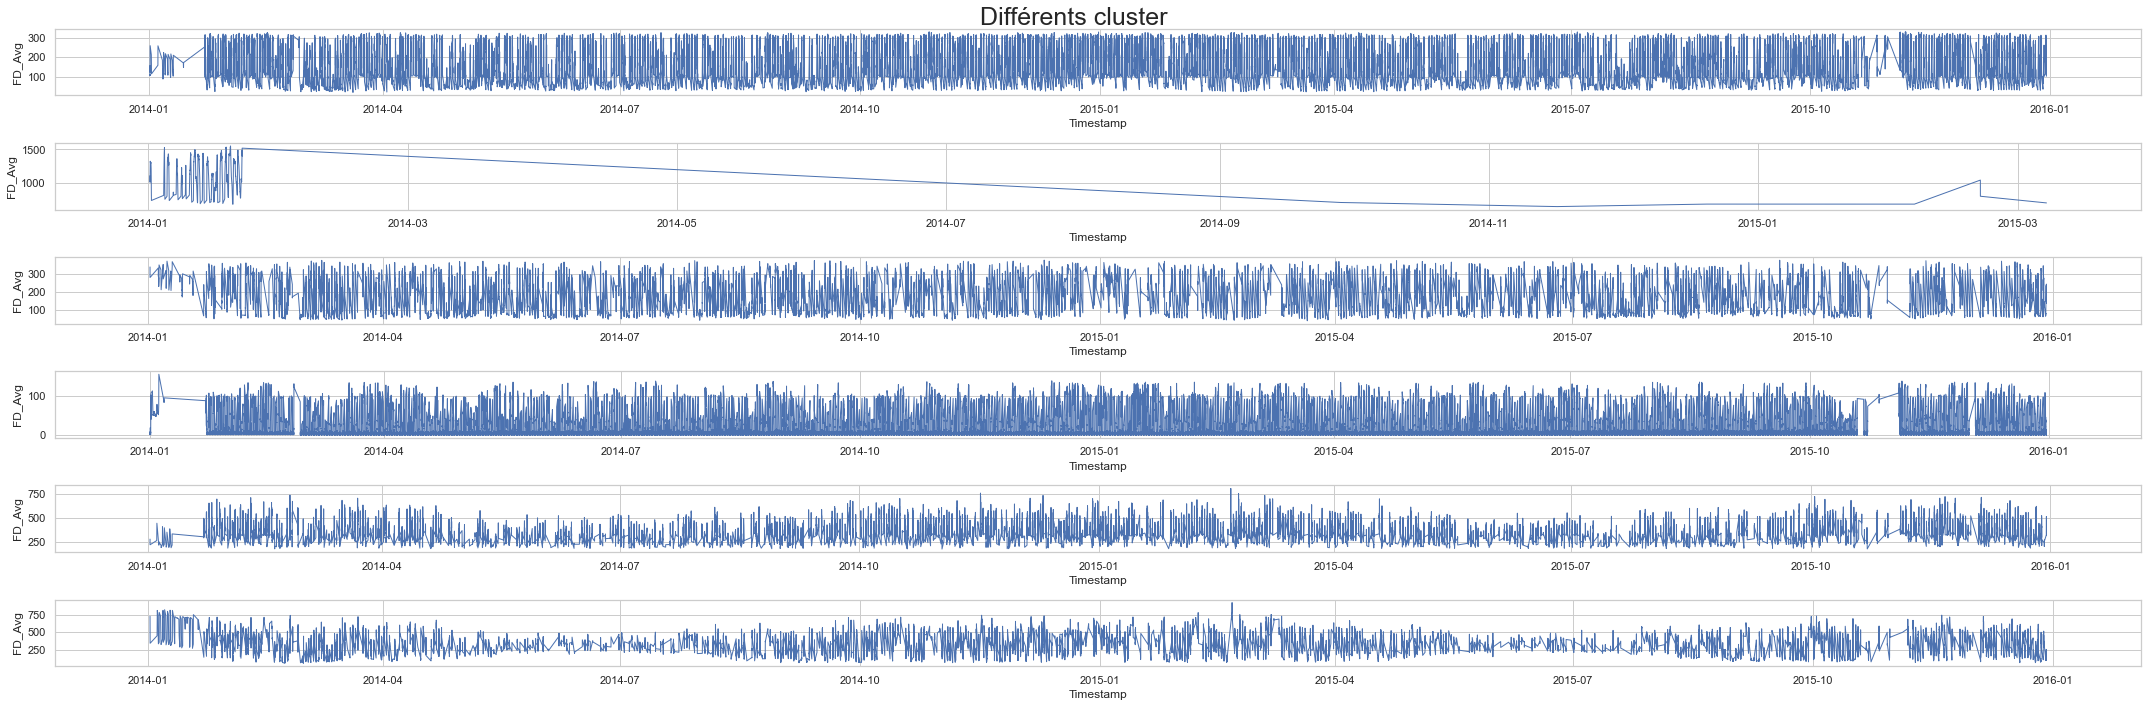

In [216]:
#WOnly cluster 5
fig , axes = plt.subplots(6,1,figsize = (30,10))
sns.set_theme(style="whitegrid")
plt.suptitle('Différents cluster', size = 25)

    
for i in range(nb_cluster): 
    df_cluster5 = df_Moufia[df_Moufia.cluster == i]
    sns.lineplot(ax = axes[i], x = df_cluster5.index, y= "FD_Avg", data=df_cluster5, palette="tab10", linewidth=1)
    print(f'Draw the {i} graph.')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
fig.savefig("Moufia_clusters")

<AxesSubplot:xlabel='Timestamp', ylabel='FD_Avg'>

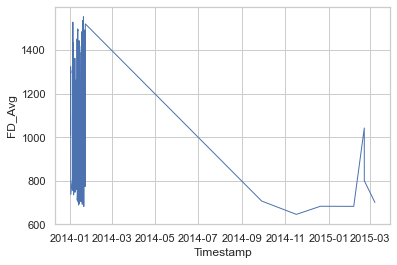

In [212]:
df_cluster5 = df_Moufia[df_Moufia.cluster == 1]
sns.lineplot(x = df_cluster5.index, y= "FD_Avg", data=df_cluster5[["FD_Avg"]], palette="tab10", linewidth=1)

3    912
0    276
4    129
2     36
5     27
Name: cluster, dtype: int64


<ipython-input-219-72aed8755290>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  daily_plot.set_xticklabels(x_legend, rotation=45)


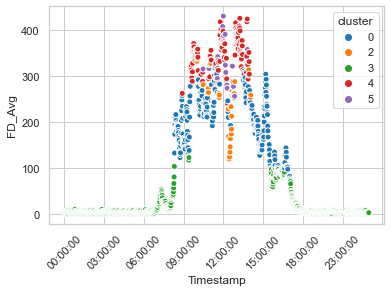

In [219]:
daily_data_winter =  df_Moufia[(df_Moufia.index >="2015-06-07 00:00:00") &  (df_Moufia.index < "2015-06-07 23:00:00")]
#2014-01-04 00:00:00 
# L’année se divise en deux grandes périodes : la saison chaude et humide, 
#de novembre à avril : c’est l’été austral et la saison plus sèche et plus fraîche, 
#de mai à octobre : c’est l’hiver austral.
print(daily_data_winter['cluster'].value_counts())
fig, ax = plt.subplots()
daily_plot = sns.scatterplot(ax = ax, x="Timestamp",y= "FD_Avg", data=daily_data_winter, hue ="cluster", palette="tab10", linewidth=1)
x_legend = ["00:00:00","03:00:00","06:00:00","09:00:00","12:00:00","15:00:00","18:00:00","23:00:00"]
daily_plot.set_xticklabels(x_legend, rotation=45)
fig.savefig("Moufia_scatterplot_winterDay")

3    796
4    258
0    224
2     74
5     28
Name: cluster, dtype: int64


<ipython-input-220-ec946fd12cc1>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  daily_plot.set_xticklabels(x_legend, rotation=45)


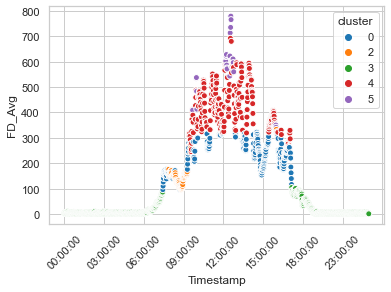

In [220]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
daily_data_summer =  df_Moufia[(df_Moufia.index >="2015-02-07 00:00:00") &  (df_Moufia.index < "2015-02-07 23:00:00")]
#2014-01-04 00:00:00 
# L’année se divise en deux grandes périodes : la saison chaude et humide, 
#de novembre à avril : c’est l’été austral et la saison plus sèche et plus fraîche, 
#de mai à octobre : c’est l’hiver austral.
print(daily_data_summer['cluster'].value_counts())
fig, ax = plt.subplots()
daily_plot = sns.scatterplot(ax = ax, x="Timestamp",y= "FD_Avg", data=daily_data_summer, hue ="cluster", palette="tab10", linewidth=1)
x_legend = ["00:00:00","03:00:00","06:00:00","09:00:00","12:00:00","15:00:00","18:00:00","23:00:00"]
daily_plot.set_xticklabels(x_legend, rotation=45)
fig.savefig("Moufia_scatterplot_summerDay")